In [1]:
import os
import cv2
import glob
import json
import keras
import shutil
import itertools
import tensorflow
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import seaborn as sns
# from glob import glob
from PIL import Image
import tensorflow as tf
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from distutils.dir_util import copy_tree
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization

%matplotlib inline

In [2]:
# Get working directory
work_dir = '../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/'
os.listdir(work_dir)

['valid', 'train']

In [3]:
# Make a new directory for the corn dataset
!mkdir corn

!mkdir ./corn/train
!mkdir ./corn/valid

mkdir: cannot create directory ‘corn’: File exists
mkdir: cannot create directory ‘./corn/train’: File exists
mkdir: cannot create directory ‘./corn/valid’: File exists


In [4]:
# Create different directories (folders) for the corn classes
!mkdir ./corn/train/Corn_(maize)___Northern_Leaf_Blight
!mkdir ./corn/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
!mkdir ./corn/train/Corn_(maize)___Common_rust_
!mkdir ./corn/train/Corn_(maize)___healthy

!mkdir ./corn/valid/Corn_(maize)___Northern_Leaf_Blight
!mkdir ./corn/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
!mkdir ./corn/valid/Corn_(maize)___Common_rust_
!mkdir ./corn/valid/Corn_(maize)___healthy

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir ./corn/train/Corn_(maize)___Northern_Leaf_Blight'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir ./corn/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir ./corn/train/Corn_(maize)___Common_rust_'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir ./corn/train/Corn_(maize)___healthy'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir ./corn/valid/Corn_(maize)___Northern_Leaf_Blight'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir ./corn/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir ./corn/valid/Corn_(maize)___Common_rust_'
/bin/

### Get the Training data

In [5]:
# Get the training data for the Corn Northern Leaf Blight
dest_dir = "./corn/train/Corn_(maize)___Northern_Leaf_Blight"
for file in glob.glob('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight'):
    print(file)
    copy_tree(file, dest_dir)

/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight


In [6]:
# Get the training data for the Cercospora Leaf spot Gray Leaf spot
dest_dir = "./corn/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot"
for file in glob.glob('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'):
    print(file)
    copy_tree(file, dest_dir)

/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


In [7]:
# Get the training data for the Corn Common rust
dest_dir = "./corn/train/Corn_(maize)___Common_rust_"
for file in glob.glob('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_'):
    print(file)
    copy_tree(file, dest_dir)

/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_


In [8]:
# Get the training data for the Corn Healthy
dest_dir = "./corn/train/Corn_(maize)___healthy"
for file in glob.glob('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy'):
    print(file)
    copy_tree(file, dest_dir)

/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy


### Get the Validation data

In [9]:
# Get the Validation data for Corn Northern Leaf Blight
dest_dir = "./corn/valid/Corn_(maize)___Northern_Leaf_Blight"
for file in glob.glob('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Northern_Leaf_Blight'):
    print(file)
    copy_tree(file, dest_dir)

/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Northern_Leaf_Blight


In [10]:
# Get the Validation data for the Cercospora Leaf spot Gray Leaf spot
dest_dir = "./corn/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot"
for file in glob.glob('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'):
    print(file)
    copy_tree(file, dest_dir)

/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


In [11]:
# Get the Validation data for the Corn Common rust
dest_dir = "./corn/valid/Corn_(maize)___Common_rust_"
for file in glob.glob('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_'):
    print(file)
    copy_tree(file, dest_dir)

/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_


In [12]:
# Get the Validation data for the Corn Healthy
dest_dir = "./corn/valid/Corn_(maize)___healthy"
for file in glob.glob('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___healthy'):
    print(file)
    copy_tree(file, dest_dir)

/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___healthy


### EDA

- Get training dataset for EDA

In [13]:
# get training data
dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"

# Get Images and length of images
Blight = glob.glob(os.path.join(dir+"Corn_(maize)___Northern_Leaf_Blight/"+"*"))
Common_Rust = glob.glob(os.path.join(dir+"Corn_(maize)___Common_rust_/"+"*"))
Gray_Leaf_Spot = glob.glob(os.path.join(dir+"Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/"+"*"))
healthy = glob.glob(os.path.join(dir+"Corn_(maize)___healthy/"+"*"))

# Print the length of each training class
print("Images with Blight, Common_Rust and Gray Leaf Spot are \n"+str(len(Blight))+"  \t"+ 
      str(len(Common_Rust))+"\t"+str(len(Gray_Leaf_Spot)))
print("Healthy Images are \n" + str(len(healthy)))

Images with Blight, Common_Rust and Gray Leaf Spot are 
1908  	1907	1642
Healthy Images are 
1859


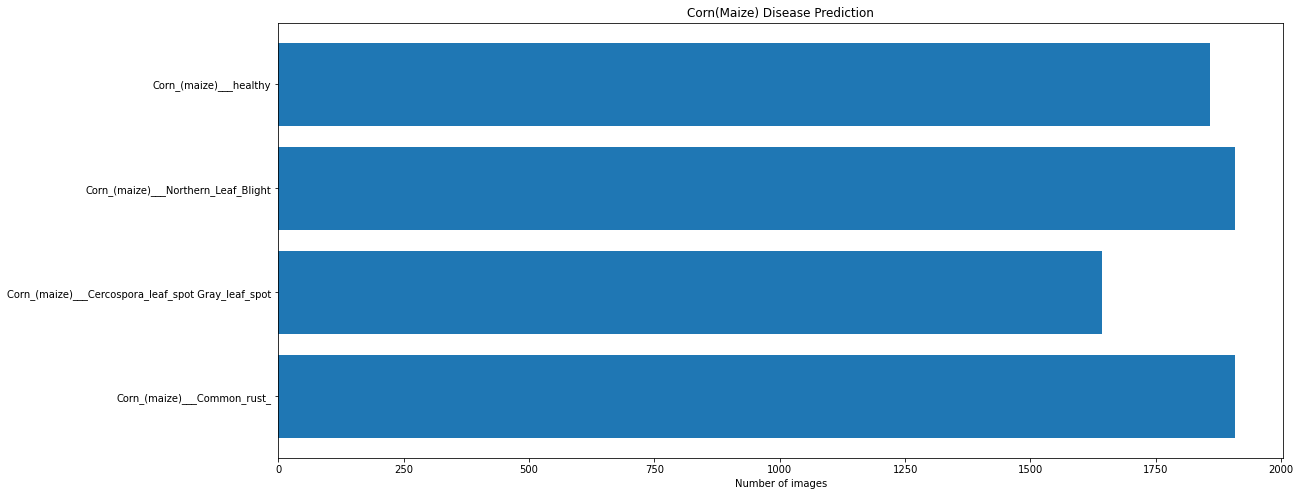

In [14]:
# check if there is class imbalance
classes = [len(Common_Rust), len(Gray_Leaf_Spot), len(Blight), len(healthy)]
labels = ('Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
           'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy')

y_pos = range(len(classes))

fig = plt.figure(figsize=(18,8))
plt.barh(y_pos, classes, align='center', alpha=1)
plt.yticks(y_pos, labels)
plt.xlabel('Number of images')
plt.title('Corn(Maize) Disease Prediction')
plt.show()

### Taking only first 8 images for Visualization

In [15]:
blight = Blight[:8]
health = healthy[:8]
rust = Common_Rust[:8]
grayspot = Gray_Leaf_Spot[:8]

In [16]:
# function to display images
def showImages(images):
    plt.figure(figsize=(20,35))
    for i,k  in enumerate(images):
        image = Image.open(k)
        plt.subplot(4,4,i+1)
        plt.imshow(image)

### Images of Gray Spot Leaf

Showing Images of the  Gray Spot Leaf


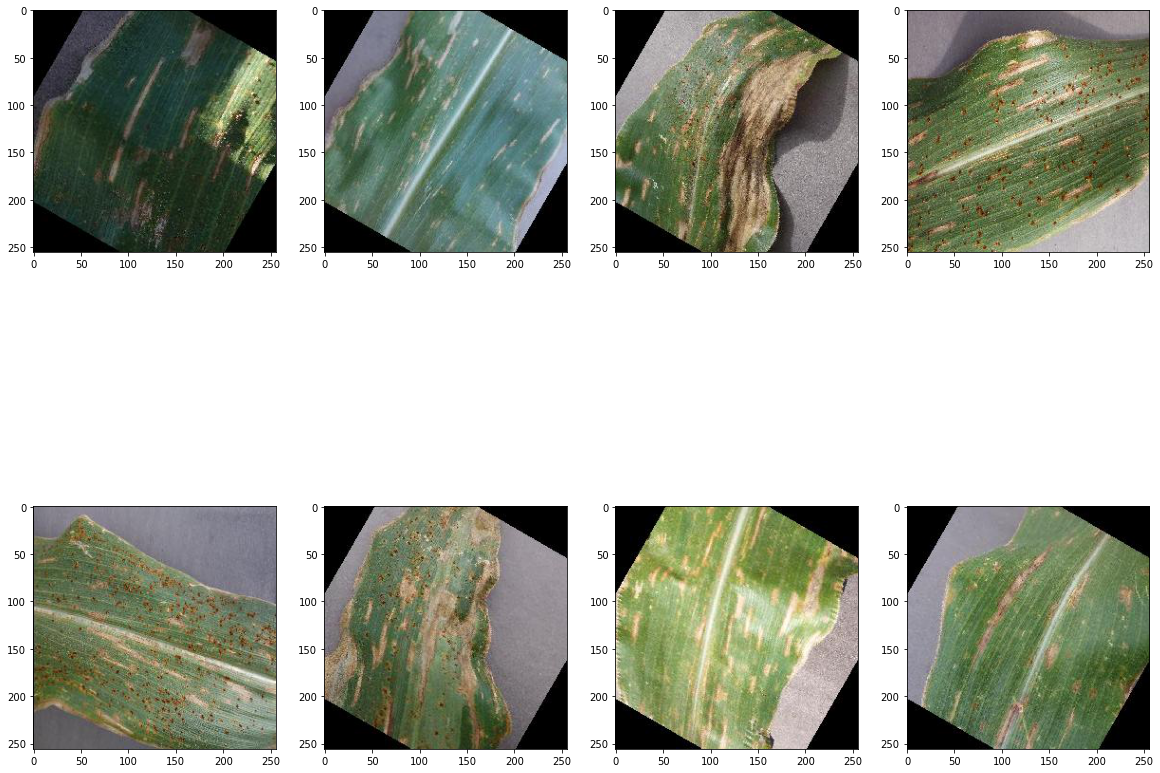

In [17]:
print("Showing Images of the  Gray Spot Leaf")
showImages(grayspot)

### Images of Common rust Leaf

Showing Images of the Common rust Leaf


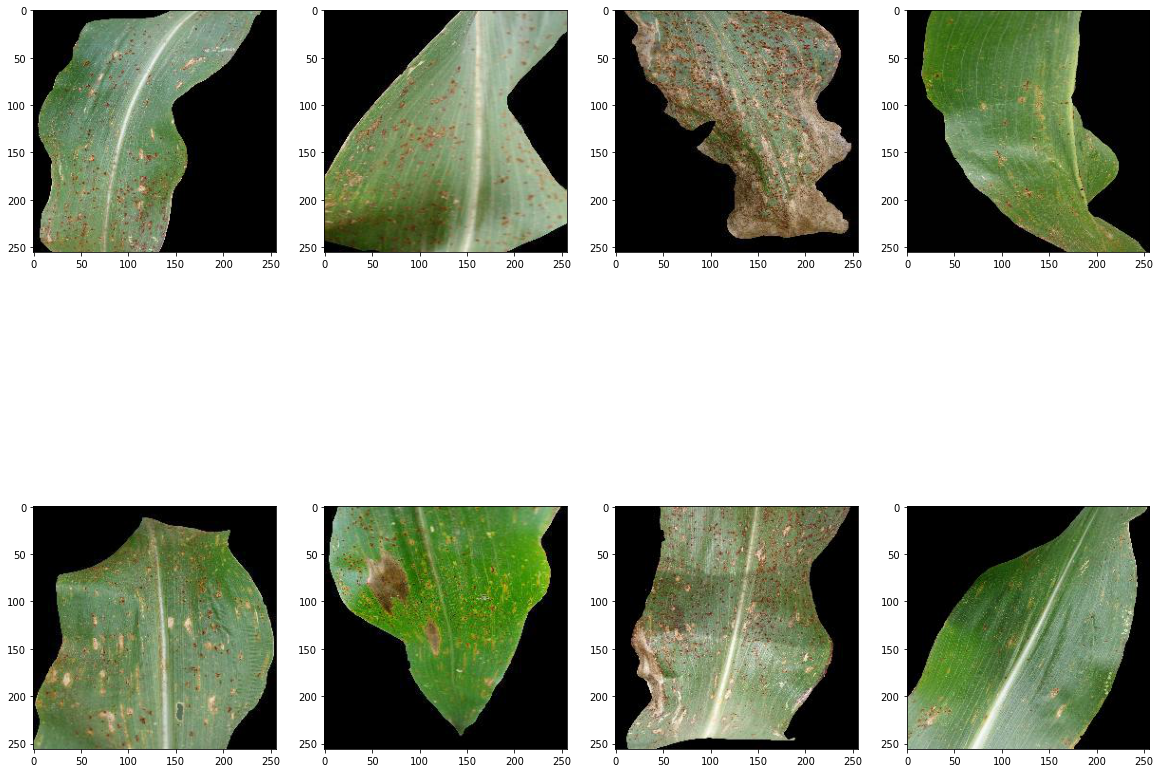

In [18]:
print("Showing Images of the Common rust Leaf")
showImages(rust)

### Images of Blight Leaf

Showing Images of the Blight Leaf


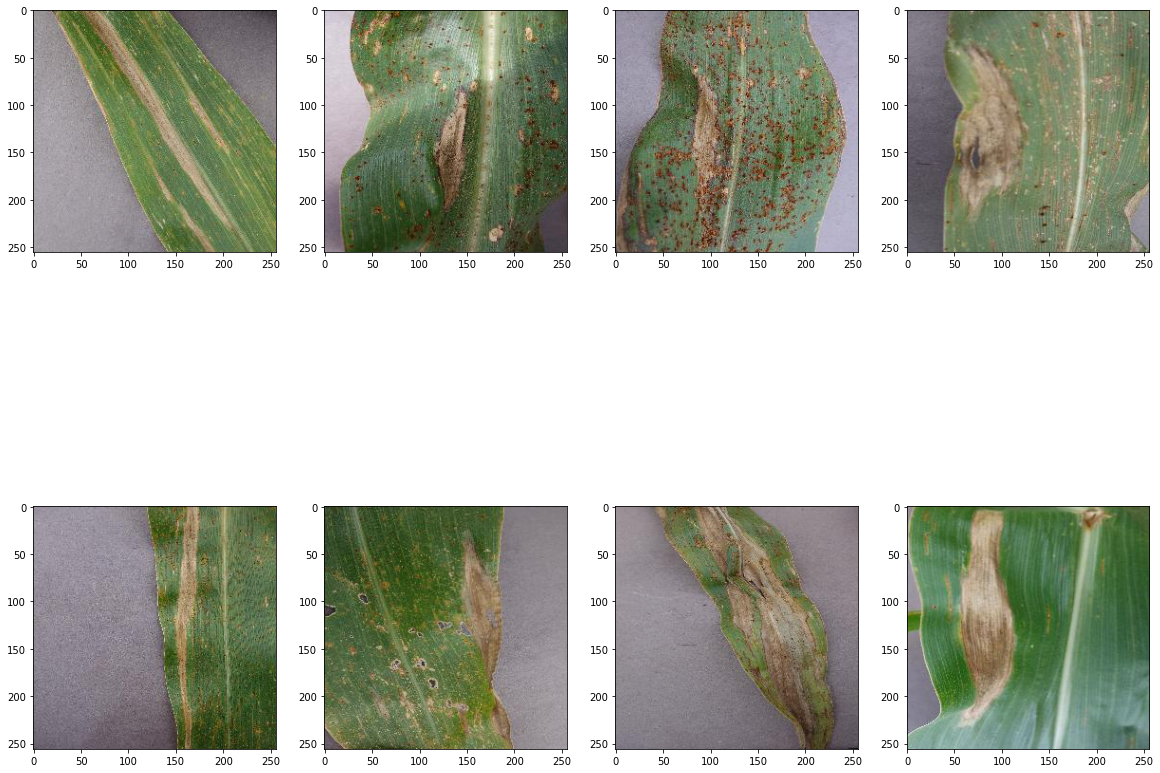

In [19]:
print("Showing Images of the Blight Leaf")
showImages(blight)

### Healthy Leaf images

Showing Images of the Healthy Leaf


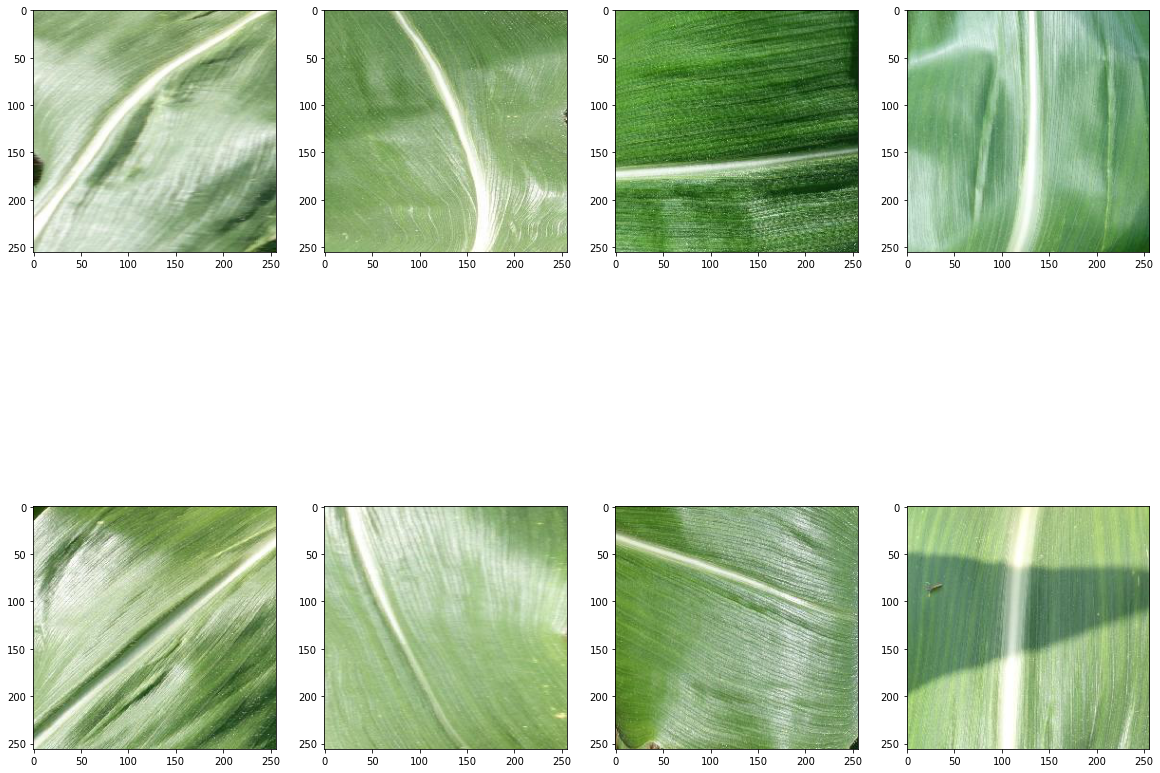

In [20]:
print("Showing Images of the Healthy Leaf")
showImages(health)

### Models to explore for our use-case
- VGG-16
- VGG19
- Inception-V3
- AlexNet
- ResNet
- SqueezeNet

#### Get the train and valid with path

In [21]:
# path to both the training and validation dataset
path = "./corn"
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
valid_path = os.path.join(path, "valid")
print(os.listdir(valid_path))

['Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']
****************************************************************************************************
['Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']


- Using the glob function to access the folders.

In [22]:
# Use the glob function to get access to the training tomato datasets
folders_train = glob.glob("./corn/train/*")
folders_train
len(folders_train)

4

In [23]:
# Use the glob function to get access to the validation tomato datasets
folders_valid = glob.glob("./corn/valid/*")
folders_valid
len(folders_valid)

4

### Visual Geometry Group (VGG) net

- The original input image of dimension 256 x 256 was augmented to a dimension of `227 x 227` for the `AlexNet model` and `224 x224` for the `VGG16 net`.

- vgg16 input shape and weight

- weights: 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.

- input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with channels_first data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.

In [24]:
def model_compile(training_folders, SIZE):
    vg16 = VGG16(input_shape = SIZE + [3], weights="imagenet", include_top=False)
    for layer in vg16.layers:
        layer.trainable = False 
    
    # Flattening the output layer
    x = Flatten()(vg16.output)
    prediction = Dense(len(training_folders), activation="softmax")(x)
    modelvg = Model(inputs=vg16.input, outputs=prediction)
    
    opt = Adam(lr=0.0001)       
    modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    return modelvg

In [25]:
# VGG image size
SIZE = [224, 224]
# Compiling the model
modelvg = model_compile(folders_train, SIZE)

58892288/58889256 [==============================] - 1s 0us/step


- `VGG16` model summary

In [26]:
modelvg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Data Augmentation
- `Data augmentation` is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. `Data augmentation` techniques such as `cropping`, `padding`, and `horizontal flipping` are commonly used to train large neural networks.

- `Image data augmentation` is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. ... Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize.

- `Image augmentation` is a technique of altering the existing data to create some more data for the model training process. In other words, it is the process of artificially expanding the available dataset for training a deep learning model.

- The `steps_per_epoch` argument must specify the number of batches of samples comprising one epoch. For example, if your original dataset has 10,000 images and your batch size is 32, then a reasonable value for `steps_per_epoch` when fitting a model on the augmented data might be `ceil(10,000/32)`, or `313 batches`.

- The images in the dataset are not used directly. Instead, only `augmented images` are provided to the model. Because the `augmentations` are performed randomly, this allows both modified images and close facsimiles of the original images (e.g. almost no augmentation) to be generated and used during training.

In [27]:
def Model_fit(train_path, valid_path):
    # Image data augmentation is only applied to the training dataset
    # Using the Image DataGenerator class
    train_dataugmen_vg16 = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

    # Image data augmentation is not to be applied to the validation/testing dataset
    test_dataugmen_vg16 = ImageDataGenerator(rescale=1./255)
    
    train_set_vg16 = train_dataugmen_vg16.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")
    
    valid_set_vg16 = test_dataugmen_vg16.flow_from_directory(valid_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")
    
    r_vg16 = modelvg.fit(train_set_vg16,
                       validation_data=valid_set_vg16,
                       epochs=20, 
#                         epochs = train_set_vg19.n // train_set_vg19.batch_size,
                       steps_per_epoch=len(train_set_vg16),
                       validation_steps=len(valid_set_vg16))
    return r_vg16

In [28]:
r_vg16 = Model_fit(train_path, valid_path)

Found 7316 images belonging to 4 classes.
Found 1829 images belonging to 4 classes.
Epoch 1/20
229/229 [==============================] - 104s 433ms/step - loss: 0.6552 - accuracy: 0.8046 - val_loss: 0.2127 - val_accuracy: 0.9410
Epoch 2/20
229/229 [==============================] - 96s 418ms/step - loss: 0.2047 - accuracy: 0.9446 - val_loss: 0.1612 - val_accuracy: 0.9513
Epoch 3/20
229/229 [==============================] - 95s 416ms/step - loss: 0.1591 - accuracy: 0.9536 - val_loss: 0.1362 - val_accuracy: 0.9617
Epoch 4/20
229/229 [==============================] - 95s 417ms/step - loss: 0.1210 - accuracy: 0.9646 - val_loss: 0.1211 - val_accuracy: 0.9634
Epoch 5/20
229/229 [==============================] - 96s 419ms/step - loss: 0.1068 - accuracy: 0.9657 - val_loss: 0.1125 - val_accuracy: 0.9677
Epoch 6/20
229/229 [==============================] - 94s 410ms/step - loss: 0.0997 - accuracy: 0.9698 - val_loss: 0.1030 - val_accuracy: 0.9661
Epoch 7/20
229/229 [=========================

- Visualization for VGG19

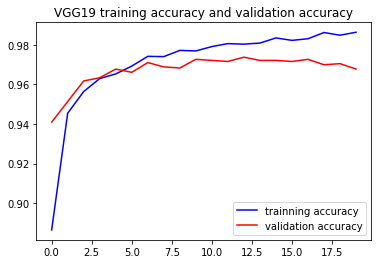

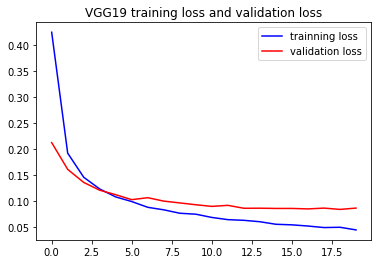

In [30]:
import matplotlib.pyplot as plt

accuracy = r_vg16.history['accuracy']
val_accuracy = r_vg16.history['val_accuracy']

loss = r_vg16.history['loss']
val_loss = r_vg16.history['val_loss']

epochs = range(len(accuracy))
plt.title("VGG16 training accuracy and validation accuracy")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.title("VGG16 training loss and validation loss")
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [44]:
# Save the vgg16 model
modelvg.save("VGG16_CORN_MODEL.h5")

In [45]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("VGG16_CORN_MODEL.h5")

In [46]:
# Make predictions using the test dataset
prediction = model.predict([prepare("../input/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG")])
np.argmax(prediction)

1

In [47]:
prediction = model.predict([prepare("../input/new-plant-diseases-dataset/test/test/CornCommonRust3.JPG")])
np.argmax(prediction)

1

In [48]:
prediction = model.predict([prepare("/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/1157b4eb-dfb3-41b7-a083-77b0ca2e7634___RS_GLSp 4460_new30degFlipLR.JPG")])
np.argmax(prediction)

0

In [49]:
prediction = model.predict([prepare("/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/44927b10-a45a-4c36-becb-2d410f06d77e___R.S_HL 7967 copy 2_flipLR.jpg")])
np.argmax(prediction)

3

- Save the vgg16 model as a tar.gz file

In [50]:
import tarfile
import os.path

model_pth = "./"
os.listdir(model_pth)

output_dir = "/"
os.listdir(output_dir)

def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

source_dir = model_pth
output_filename = 'VGG16_CORN_MODEL' + '.tar.gz'
make_tarfile(output_filename, source_dir)